In [256]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
import math


In [257]:
def rmsValue(array):
    n = len(array)
    squre = 0.0
    root = 0.0
    mean = 0.0
    
    #calculating Squre
    for i in range(0, n):
        squre += (array[i] ** 2)
    #Calculating Mean
    mean = (squre/ (float)(n))
    #Calculating Root
    root = math.sqrt(mean)
    return root

In [258]:
offsource, fsoff= sf.read("resultatsBinaural/binauralbot.wav")

In [259]:
onsource, fson = sf.read("screcs2/scbot.aiff")

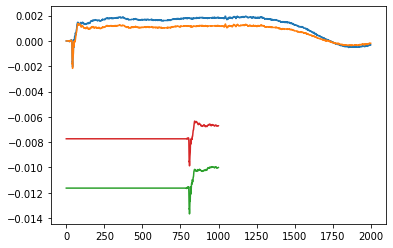

In [260]:
plt.plot(offsource[:2000])
plt.plot(onsource[:1000])

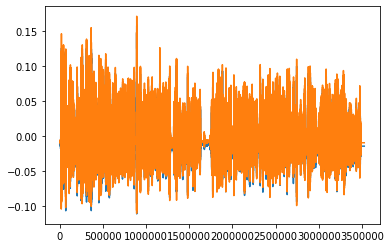

In [261]:
plt.plot(onsource)

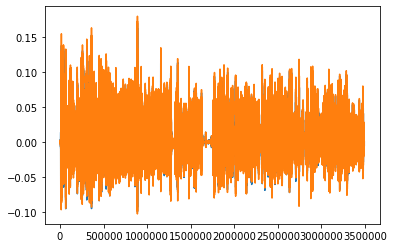

In [262]:
plt.plot(offsource)

In [263]:
from scipy import signal
corr = signal.correlate(offsource[:,0], onsource[:,0], mode='same')

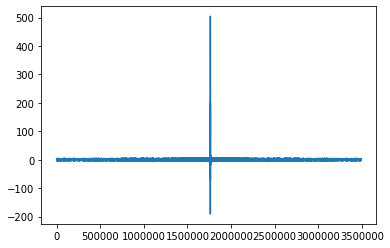

In [264]:
plt.plot(corr)

In [265]:
x = np.argmax(corr)

In [266]:
y = x - len(onsource)/2

In [267]:
print(y)

-768.0


In [268]:
x = len(onsource)
n = int(np.abs(y))

onlineL = np.zeros(n+x)
onlineR = np.zeros(n+x)

onlineL[n:] = onsource[:,0] 
onlineR[n:] = onsource[:,1] 

onsource2 = np.array([onlineL, onlineR])
onsource2 = onsource2.T

In [269]:
x = len(offsource)
n = int(np.abs(y))

offlineL = np.zeros(n+x)
offlineR = np.zeros(n+x)

offlineL[n:] = offsource[:,0] 
offlineR[n:] = offsource[:,1] 

offsource2 = np.array([offlineL, offlineR])
offsource2 = offsource2.T

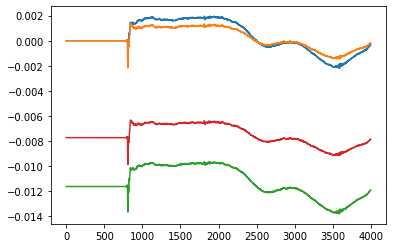

In [270]:
plt.plot(offsource2[:4000])
plt.plot(onsource[:4000])


In [271]:
ampL = offsource2[0][0] - onsource[0][0] 
ampR = offsource2[0][1] - onsource[0][1]

print(ampL, ampR)


0.011628951877355576 0.007730274461209774


In [272]:
rmsOffL = rmsValue (offsource2[0])
rmsOffR  = rmsValue (offsource2[1])
rmsOnL = rmsValue (onsource[0])
rmsOnR = rmsValue (onsource[1])

rmsL = 1+rmsOnL


print(rmsL,rmsOffR,rmsOnL,rmsOnR,rmsL,rmsR)

1.0098739471593554 0.0 0.009873947159355367 0.009873947159355367 1.0098739471593554 0.0


In [275]:
aux = offsource2[:x,0] - onsource[:x,0]
aux1 = offsource2[:x,1] - onsource[:x,1]

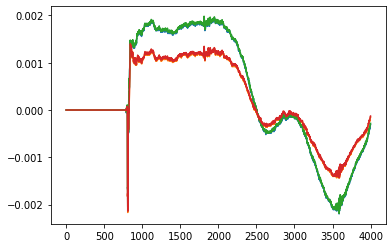

In [274]:
n = len(onsource[:,0])
for i in range (0,n):
    onsource[i][0] = onsource[i][0] + ampL
    onsource[i][1] = onsource[i][1] + ampR
    
plt.plot(offsource2[:4000])
plt.plot(onsource[:4000])


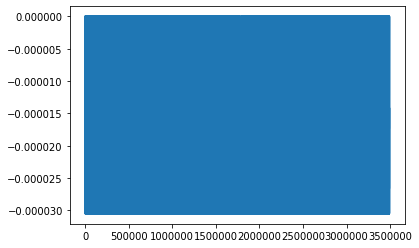

In [276]:
plt.plot(aux)

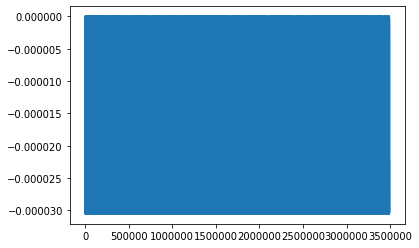

In [277]:
plt.plot(aux1)

In [278]:
eps = np.power(10,-120/20)

auxeps = aux + eps
auxeps1 = aux1 + eps

In [279]:
dbL = 20*np.log10(np.abs(auxeps))
dbR = 20*np.log10(np.abs(auxeps1))

L'error absolut màxim és:  -90.5950975653539 dB


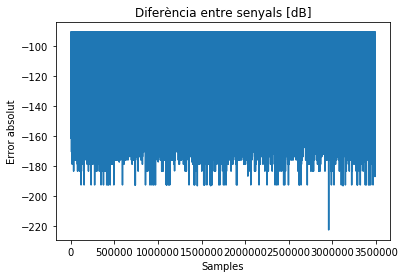

In [288]:
plt.title("Diferència entre senyals [dB]")
plt.xlabel("Samples")
plt.ylabel("Error absolut")
plt.plot(dbL)
print("L'error absolut màxim és: ", np.max(dbL), "dB")

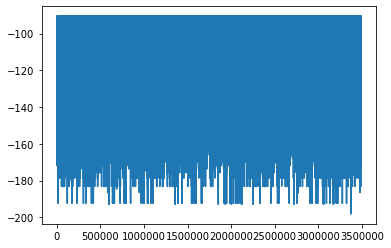

In [281]:
plt.plot(dbR)